In [1]:
# -*- coding: utf8 -*-
import os
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import openturns as ot
from openturns.viewer import View
import json
import requests

TO DO : 
- modifier le test sur le type de 
- mail d'inscription 
- résoudre la création de python function 
- tester des PEX classiques et étudier la pertinence dans le cadre d'évènements rares
- plans itératifs comme l'EGO : nécéssite l'accès à la fonction. Peut-ont faire l'EGO sur la Pf ? 
- FORM associée à des trucs 

In [2]:
from evaluate import evaluate

In [3]:
username = 'testuser'
password = 'testpass'
set_id = -1
problem_id  = 2
def g_fun(x):
        #g_val_comp = evaluate(username, password, set_id, problem_id, x)
        g_val_sys, g_val_comp, msg = evaluate(username, password, set_id, problem_id, x)
        return g_val_comp

In [4]:
dist_X1 = ot.Normal(0., 1.)
dist_X2 = ot.Normal(0., 1.)
myDistribution = ot.ComposedDistribution([dist_X1, dist_X2])
myRandomVector = ot.RandomVector(myDistribution)

In [5]:
x = [0.545, 1.23]

In [6]:
g_fun(x)

[1.2918078899383545]

## LHS 

In [9]:
LHS = ot.LHSExperiment(myDistribution, 10000)
LHS.setAlwaysShuffle(True)
SA_profile = ot.GeometricProfile(10., 0.95, 20000)
LHS_optimization_algo = ot.SimulatedAnnealingLHS(LHS, SA_profile, ot.SpaceFillingC2())
LHS_optimization_algo.generate()
LHS_design = LHS_optimization_algo.getResult()
LHS_design = LHS_design.getOptimalDesign()

In [10]:
z = np.array(LHS_design)
z[:,0]

array([ 0.1521005 , -0.19074318,  1.70921263, ..., -0.13812358,
       -0.44329518, -0.59777303])

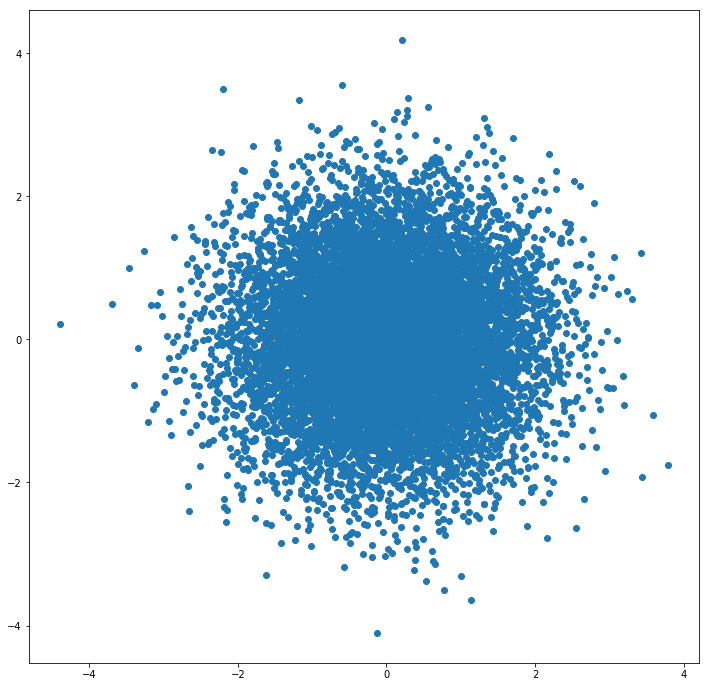

In [11]:
plt.figure(figsize = (12,12))
plt.scatter(z[:,0], z[:,1])

In [ ]:
plt.hist(g_fun(z))